In [ ]:
!pip install opencv-python

In [1]:
import cv2,time
video = cv2.VideoCapture(0)
faceCascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
a = 1
while True:
    a = a + 1
    check,frame = video.read()
    print(frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.3, 4)

    # faces = faceCascade.detectMultiScale(
    #     gray,
    #     scaleFactor=1.1,
    #     minNeighbors=5,
    #     minSize=(30, 30),
    #     flags=cv2.CASCADE_SCALE_IMAGE
    # )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
 # Display the resulting frame
    cv2.imshow('Video', frame)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
print(a)
video.release()
cv2.destroyAllWindows()


[ 20  14  28]
  [ 30  14  26]
  [ 31  15  28]]

 [[115 116 112]
  [115 116 112]
  [112 112 110]
  ...
  [ 18  13  27]
  [ 19  17  26]
  [ 19  17  26]]

 ...

 [[ 21  10  29]
  [ 21  10  29]
  [ 13  11  29]
  ...
  [ 20  15  26]
  [ 23  14  33]
  [ 25  16  35]]

 [[ 11  11  29]
  [ 11  11  29]
  [ 16  12  31]
  ...
  [ 20  15  26]
  [ 24  15  36]
  [ 24  15  36]]

 [[ 15  11  29]
  [ 15  11  29]
  [ 20  10  41]
  ...
  [ 19  17  26]
  [ 28  14  38]
  [ 28  14  38]]]
[[[122 113 105]
  [125 115 107]
  [114 119  98]
  ...
  [ 25  16  37]
  [ 29  15  37]
  [ 29  15  37]]

 [[119 112 103]
  [121 114 106]
  [114 116 107]
  ...
  [ 25  16  37]
  [ 25  14  42]
  [ 24  13  41]]

 [[111 112 107]
  [112 113 108]
  [112 112 110]
  ...
  [ 24  16  32]
  [ 16  15  38]
  [ 16  15  38]]

 ...

 [[ 10  12  32]
  [  9  11  31]
  [ 11  11  29]
  ...
  [ 15  12  24]
  [ 14  14  14]
  [ 17  17  17]]

 [[ 14  10  27]
  [ 16  13  29]
  [ 19  14  33]
  ...
  [ 14  11  23]
  [ 14  13  16]
  [ 19  18  20]]

 [[ 

Faces found in test1 image:  3
Faces found in test2 image:  15
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


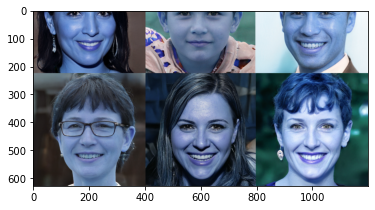

In [20]:
import cv2,time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#load test iamge
test1 = cv2.imread('images/test1.png')
test2 = cv2.imread('images/test2.jpg')

img1 = np.copy(test1)
#convert the test image to gray image as opencv face detector expects gray images
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)

#display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#or if you have matplotlib installed then 
plt.imshow(img1,cmap = 'gray')

#plt.imshow(gray_img2,cmap = 'gray')

faces1 = haar_face_cascade.detectMultiScale(gray_img1, scaleFactor=1.1, minNeighbors=5)
faces2 = haar_face_cascade.detectMultiScale(gray_img2, scaleFactor=1.1, minNeighbors=5)

#print the number of faces found
print('Faces found in test1 image: ', len(faces1))
print('Faces found in test2 image: ', len(faces2))


print(type(test2))
img_copy = np.copy(test2)
print(type(img_copy))


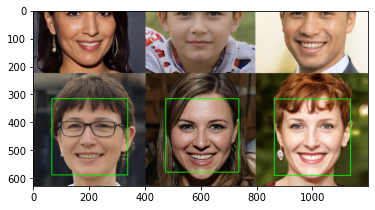

In [24]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = np.copy(colored_img)
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

#load another image
test2 = cv2.imread('images/test1.png')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))
